# Red neuronal para el análisis del contenido

Usando los datos procesados en [Cleaning_news](Cleaning_news.ipynb), vamos a construir una NN con Keras para clasificar los textos.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
#Nicer style
style.use('seaborn') 

from tensorflow import keras as k

from sklearn.model_selection import train_test_split

from gensim.models import KeyedVectors

In [28]:
data = pd.read_pickle('../data/news_proc.pickle')

In [29]:
data.head()

,type,content,title,one_hot_label
0,fake,"[2458, 4, 27, 17625, 12, 328, 5, 25587, 416, 1...","[1732, 258, 27, 7196, 2154, 4192, 88, 43, 13, ...","[0, 1, 0]"
1,fake,"[3836, 22, 506, 3059, 67, 2, 2941, 2429, 33, 3...","[6117, 13034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0]"
2,fake,"[7, 37481, 39852, 483, 423, 24, 42, 1837, 81, ...","[6117, 13034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0]"
3,fake,"[7, 1790, 659, 24, 846, 6786, 5428, 17, 52, 44...","[13341, 1421, 1992, 1178, 8704, 11, 13034, 387...","[0, 1, 0]"
4,fake,"[59, 24, 216, 529, 104, 11, 34925, 133, 31, 24...","[13034, 43, 39049, 43, 76, 1588, 38, 23, 8158,...","[0, 1, 0]"


Eliminar sobrerrepresentación de los fake

In [5]:
dfake = data[data['type'] == 'fake']
dtrue = data[data['type'] == 'truth']
dclic = data[data['type'] == 'click']

In [6]:
data = pd.concat([dfake.head(10000), dtrue, dclic])

In [7]:
del dfake, dtrue, dclic

In [8]:
max_size_content = len(data['content'][0])

In [9]:
max_size_content

1866

### Word2Vec

In [10]:
model = KeyedVectors.load_word2vec_format("../data/GoogleNews-vectors-negative300.bin.gz", binary=True,
                                          limit=50000)

In [11]:
embed_mat = np.zeros((50000,300))

In [12]:
for i, e in model.vocab.items():
    embed_mat[e.index] = model[i]


Train / test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['one_hot_label'], test_size=0.4, random_state=1)

In [31]:
np.array(X_train)[0]

[7,
 268,
 8133,
 1468,
 11,
 675,
 659,
 23,
 1364,
 3425,
 5,
 226,
 5,
 2313,
 4387,
 11,
 29447,
 2724,
 258,
 734,
 542,
 1468,
 2097,
 14472,
 4163,
 24,
 908,
 11,
 1113,
 2,
 21587,
 21587,
 21587,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [15]:
del data

Arquitectura de la red

In [20]:
model = k.models.Sequential()

model.add(k.layers.Embedding(50000, 300, input_length=1866,
                    weights=[embed_mat], trainable=False))

#model.add(k.layers.LSTM(300, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))

model.add(k.layers.Dense(300, activation='relu'))
model.add(k.layers.Dense(200, activation='relu'))
model.add(k.layers.Dense(100, activation='relu'))

model.add(k.layers.Flatten())


model.add(k.layers.Dense(3, activation='softmax'))

In [21]:
model.compile(k.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1866, 300)         15000000  
_________________________________________________________________
dense_4 (Dense)              (None, 1866, 300)         90300     
_________________________________________________________________
dense_5 (Dense)              (None, 1866, 200)         60200     
_________________________________________________________________
dense_6 (Dense)              (None, 1866, 100)         20100     
_________________________________________________________________
flatten (Flatten)            (None, 186600)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 559803    
Total params: 15,730,403
Trainable params: 730,403
Non-trainable params: 15,000,000
__________________________________________________________

In [23]:
hist = model.fit(x=np.asarray(X_train.tolist()), y=np.asarray(y_train.tolist()), batch_size=64, epochs=15,
          callbacks = [k.callbacks.EarlyStopping(monitor='val_acc', patience=2)], validation_split=0.3)

Train on 8721 samples, validate on 3738 samples
Epoch 1/15
8721/8721 [==============================] - 11s 1ms/step - loss: 0.5098 - acc: 0.7653 - val_loss: 0.3680 - val_acc: 0.8440
Epoch 2/15
8721/8721 [==============================] - 11s 1ms/step - loss: 0.2735 - acc: 0.8953 - val_loss: 0.3380 - val_acc: 0.8748
Epoch 3/15
8721/8721 [==============================] - 11s 1ms/step - loss: 0.1496 - acc: 0.9460 - val_loss: 0.4210 - val_acc: 0.8606
Epoch 4/15
8721/8721 [==============================] - 11s 1ms/step - loss: 0.0723 - acc: 0.9756 - val_loss: 0.5062 - val_acc: 0.8678


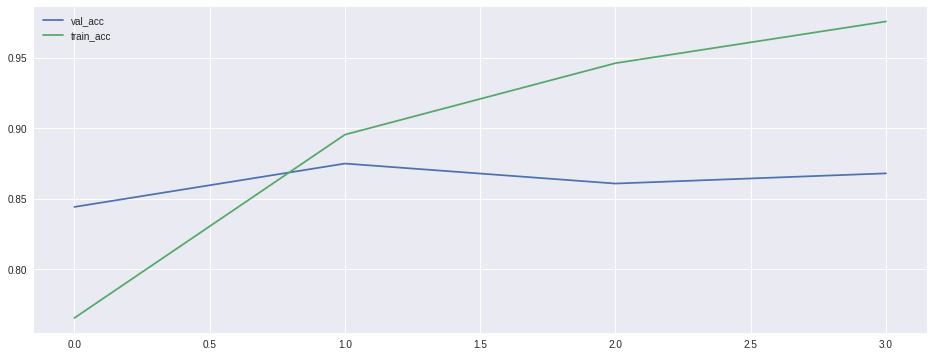

In [24]:
plt.figure(figsize=(16,6))
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['acc'], label='train_acc')
plt.legend()

Predicción

In [25]:
from sklearn.metrics import accuracy_score, f1_score

In [32]:
test_pred = model.predict(np.asarray(X_test.tolist()))

In [33]:
accuracy_score(np.array(y_test.tolist()), test_pred.round())

0.8987162750217581

In [ ]:

# Evaluate the model

scores = model.evaluate(np.array(X_test.tolist()), np.array(y_test.tolist()),
                        batch_size=32)
print('Loss:', scores[0])
print('Accuracy:', scores[1])